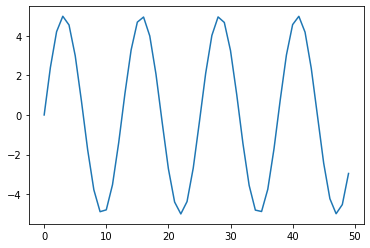

In [35]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = range(50)
y = [5 * math.sin(i/2) for i in x]
plt.plot(y)

In [66]:
import math

path = "../../test/test2/image/img_elias/sample8/afterEtching3/"
# path = "../../test/test2/RIE/training4/sio2_step/"
xVal = []
yVal = []
f = open(path + "data.txt", "r")
iterator = 0
for line in f:
    if iterator == 0:
        iterator += 1
        continue
    coord = line.split(' ')
    x = coord[0]
    e = x.find('e')
    if e == -1 :
        x_decimal = float(x)
        x_power = 0
    else :
        x_decimal = float(x[:e])
        x_power = 6 - int(x[e + 4])
    x_number = x_decimal * math.pow(10, x_power)
    y = coord[2]
    e = y.find('e')
    if e == -1 :
        y_decimal = float(y)
        y_power = 0
    else :
        y_decimal = float(y[:e])
        y_power = 9 - int(y[e + 2:e + 5])
    y_number = y_decimal * math.pow(10, y_power)
    iterator += 1
    xVal.append(round(x_number, 2))
    yVal.append(round(y_number, 2))
    

In [67]:
def compress(val, fact = 1):
    size = len(val)
    return [val[i] for i in range(size) if i / fact == i // fact]

In [70]:
y = compress(yVal, 1)
x = compress(xVal, 1)
y = np.divide(y, 100)
nbPoints = len(x)
xStart = x[0]
yStart = y[0]
xEnd = x[-1]
yEnd = y[-1]
nbConstraint = nbPoints * 3
sio2_thick = 2

## Script

In [69]:
taille = len(y)
txt = ""
# txt += """
# App.activeDocument().Body.newObject('Sketcher::SketchObject','Sketch')
# App.activeDocument().Sketch.Support = (App.activeDocument().XY_Plane, [''])
# App.activeDocument().Sketch.MapMode = 'FlatFace'
# App.ActiveDocument.recompute()
# Gui.activeDocument().setEdit('Sketch')
# Gui.activateWorkbench('SketcherWorkbench')
# import PartDesignGui
# ActiveSketch = App.ActiveDocument.getObject('Sketch')
# tv = Show.TempoVis(App.ActiveDocument)
# if ActiveSketch.ViewObject.HideDependent:
#   objs = tv.get_all_dependent(ActiveSketch)
#   objs = filter(lambda x: not x.TypeId.startswith("TechDraw::"), objs)
#   objs = filter(lambda x: not x.TypeId.startswith("Drawing::"), objs)
#   tv.hide(objs)

# if ActiveSketch.ViewObject.ShowSupport:
#   tv.show([ref[0] for ref in ActiveSketch.Support if not ref[0].isDerivedFrom("PartDesign::Plane")])

# if ActiveSketch.ViewObject.ShowLinks:
#   tv.show([ref[0] for ref in ActiveSketch.ExternalGeometry])

# tv.hide(ActiveSketch)
# ActiveSketch.ViewObject.TempoVis = tv
# del(tv)

# ActiveSketch = App.ActiveDocument.getObject('Sketch')
# if ActiveSketch.ViewObject.RestoreCamera:
#   ActiveSketch.ViewObject.TempoVis.saveCamera()


# """

for i in range(len(y)):
    txt += "App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector({},{},0),App.Vector(0,0,1),10),True)\n".format(x[i], y[i])
    if i == 1:
        txt += "App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Radius',0,3.000000))\n"
    if i >= 1:
        txt += "App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Equal',0,{}))\n".format(i)

txt +="\n"
txt += "App.ActiveDocument.Sketch.addGeometry(Part.BSplineCurve(["
for i in range(len(y)):
    txt += "App.Vector({},{})".format(x[i], y[i])
    if i < len(y) - 1:
        txt += ","
txt += "],None,None,False,3,None,False),False)\n"
txt += "\n"
txt += "conList = []\n"
for i in range(len(y)):
    txt += "conList.append(Sketcher.Constraint('InternalAlignment:Sketcher::BSplineControlPoint',{},3,7,{}))\n".format(i, i)

txt += "App.ActiveDocument.Sketch.addConstraint(conList)\n"
txt += "\n"
txt += "App.ActiveDocument.Sketch.exposeInternalGeometry({})\n".format(taille)

txt += """
App.ActiveDocument.Sketch.addGeometry(Part.LineSegment(App.Vector({0},{1},0),App.Vector({0},{8})),False)
App.ActiveDocument.Sketch.addGeometry(Part.LineSegment(App.Vector({0},{8},0),App.Vector({9},{8},0)),False)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Coincident',{5},2,{6},1)) 
App.ActiveDocument.Sketch.addGeometry(Part.LineSegment(App.Vector({9},{8},0),App.Vector({2},{3},0)),False)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Coincident',{6},2,{7},1)) 
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Coincident',{4},1,{5},1))
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Coincident',{4},2,{7},2))
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('DistanceX',{4},2,{6},2,0.000000)) 
App.ActiveDocument.Sketch.setDatum(201,App.Units.Quantity('0.000000 mm'))
""".format(xStart, yStart, xEnd, yEnd, nbPoints, nbConstraint - 1, nbConstraint, nbConstraint + 1, - sio2_thick, xEnd - xStart)

# format(xStart, yStart, nbConstraint - 1, nbConstraint, xEnd, yEnd, nbConstraint, nbConstraint + 1,\
#           nbPoints, nbConstraint - 1, nbPoints, nbConstraint + 1, nbPoints, nbConstraint)

# txt += """
# Gui.activeDocument().resetEdit()
# ActiveSketch = App.ActiveDocument.getObject('Sketch')
# tv = ActiveSketch.ViewObject.TempoVis
# if tv:
#   tv.restore()

# ActiveSketch.ViewObject.TempoVis = None
# del(tv)
 
# Gui.activateWorkbench('PartDesignWorkbench')
# App.ActiveDocument.recompute() 
# """
print(txt)

App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.0,-0.0259,0),App.Vector(0,0,1),10),True)
App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.02,-0.0254,0),App.Vector(0,0,1),10),True)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Radius',0,3.000000))
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Equal',0,1))
App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.04,-0.0298,0),App.Vector(0,0,1),10),True)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Equal',0,2))
App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.06,-0.0341,0),App.Vector(0,0,1),10),True)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Equal',0,3))
App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.08,-0.04,0),App.Vector(0,0,1),10),True)
App.ActiveDocument.Sketch.addConstraint(Sketcher.Constraint('Equal',0,4))
App.ActiveDocument.Sketch.addGeometry(Part.Circle(App.Vector(0.1,-0.0405,0),App.Vector(0,0,1),10),Tr